Dataset Description

- The dataset for the remainder of this quiz is the Appliances Energy Prediction data. 
- The data set is at 10 min for about 4.5 months. 
- The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. 
- Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. 
- The energy data was logged every 10 minutes with m-bus energy meters. 
- Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. 
- Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 

In [30]:
import pandas as pd
import seaborn as sns

data=pd.read_csv('energydata_complete.csv')
data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<AxesSubplot:xlabel='T2', ylabel='rv2'>

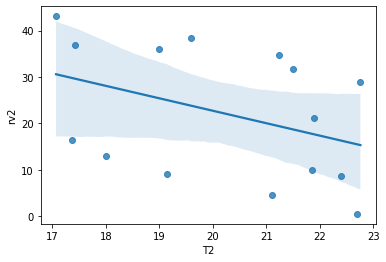

In [61]:
# select a sample of the dataset
#If you don't specify the random_state in your code, then every time you run(execute) 
#your code a new random value is generated and the train and test datasets would have different values each time.

simple_linear_reg = data[["T2", "rv2"]] \
    .sample(15, random_state=2)


# regression plot
sns.regplot(x="T2", y="rv2",
                        data=simple_linear_reg)


In [62]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

dropdata = data.drop(columns=['date', 'lights'])

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(dropdata), columns=dropdata.columns)

#I dropped the ['Heating_Load', 'Cooling_Load'] as they the output
features_df = normalised_df.drop(columns=['rv1', 'rv2'])
rv1 = normalised_df['rv1']

In [63]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
#https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(features_df, rv1, 
                                                    test_size=0.3, random_state=1)

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

#MAE
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063

0.252

● Residual Sum of Squares (RSS) 

In [55]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823

498.708

● R-Squared 

In [56]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

-0.001